In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Step1: Load DataSet:-
df = sns.load_dataset('titanic')

In [ ]:
# Step2: Data Preprocessing:-
   # removing the rows with null values in age and embarked columns
df.dropna(subset=['age','embarked'], inplace=True)
   # converting categorical values to dummy variables
df = pd.get_dummies(df, columns=['sex','embarked','class','who','deck'], drop_first=True)

In [ ]:
# Step3: Selecting X(features) and y(target):-
X=df.drop(['survived','alive','embark_town','adult_male','alone'], axis=1)
y = df['survived']

In [ ]:
print(X.shape)
print(y.shape)

(712, 18)
(712,)


In [ ]:
# Step4: Splitting dataset into train and test sets:-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape[1]

18

In [ ]:
# Step5: Building the model:-

    # (1) Defining layers
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=[X_train.shape[1]])
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
    # (2) Building model by combining layers
model = tf.keras.models.Sequential([input_layer, output_layer])
    # (3) Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step6: Training the model:-
history=model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1);

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8141 - loss: 0.4035 
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8065 - loss: 0.4239 
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7904 - loss: 0.4174 
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.4548 
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8082 - loss: 0.4174 
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8133 - loss: 0.4011 
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.4127 
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8217 - loss: 0.3993
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.4082 
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7965 - loss: 0.4434 


In [ ]:

# Step7: Evaluating the model:-
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy is: ',accuracy)
print('Test loss is: ',loss)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7608 - loss: 0.4708 
Test accuracy is:  0.7528089880943298
Test loss is:  0.5020697712898254


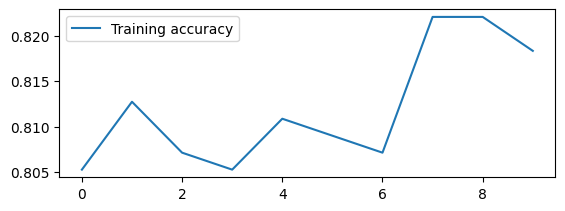

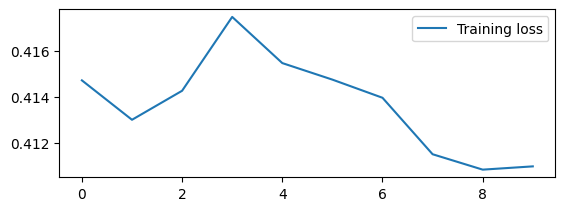

In [ ]:
# Plotting the accuracy and loss

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.xlabel='Epochs'
plt.ylable='Accuracy'
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], label='Training loss')
plt.xlabel='Epochs'
plt.ylable='Accuracy'
plt.legend()
plt.show()



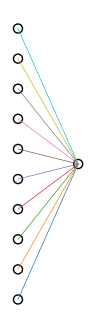

In [ ]:
# import matplotlib.pyplot as plt

# # Number of neurons per layer
# layers = [10,1]

# fig, ax = plt.subplots(figsize=(8, 4))

# x_spacing = 2
# y_spacing = 1

# for i, layer_size in enumerate(layers):
#     x = i * x_spacing
#     y_start = -(layer_size - 1) / 2

#     # Draw neurons
#     for j in range(layer_size):
#         circle = plt.Circle((x, y_start + j * y_spacing), 0.15, fill=False)
#         ax.add_patch(circle)

#         # Draw connections
#         if i > 0:
#             prev_layer_size = layers[i - 1]
#             prev_y_start = -(prev_layer_size - 1) / 2
#             for k in range(prev_layer_size):
#                 ax.plot(
#                     [(i - 1) * x_spacing, x],
#                     [prev_y_start + k * y_spacing, y_start + j * y_spacing],
#                     linewidth=0.5
#                 )

# ax.set_aspect('equal')
# ax.axis('off')
# plt.show()
